In [1]:
from pynsn import random_dot_array

In [2]:
da_specification = random_dot_array.Specs(
    target_area_radius=200,
    item_diameter_mean=13,
    item_diameter_range=(10, 25),
    item_diameter_std=4,
    item_colour=(50,10,255), # RGB colours
    minimum_gap=2)

In [3]:
# Generate random dot array with 55 dots
stimulus = random_dot_array.create(55, da_specification)

In [4]:
# dot array bis asically a list of positions and diameters that describes the pattern
print(stimulus.json())

{"xy": [[10.39227264115317, 145.8663833068207], [-59.2617166915374, -99.39653703529396], [58.65494307609333, -79.50945478398465], [-99.18983282622524, -46.43033907345182], [-73.57619470419871, 79.82528118224013], [-172.62659389809437, 46.9909668581916], [124.20155972136558, -118.76045956079331], [-74.42543226117553, 127.41903082746609], [-65.55988862110146, -183.20997042364363], [-15.744061637642403, 23.89064455464026], [135.8680632188035, 121.6975338765493], [-125.85225115779046, 122.49129858619102], [-179.17245675972683, -21.90407317184605], [-108.0525639799494, 89.02462627309353], [167.09156463590745, -63.58875095255581], [-150.07500131492935, 8.737811013243146], [35.3564302579486, 58.4035207100672], [120.2217905211836, -18.04282965337319], [-79.70434236704907, 144.2942586514991], [-92.62699422256179, -167.07435006681678], [-70.6711725465124, -2.517761257888509], [-65.87487100464253, -48.01847064184551], [-123.66883344853323, 41.012816156604515], [-144.77536112980576, 30.46287067407

# Make pictures

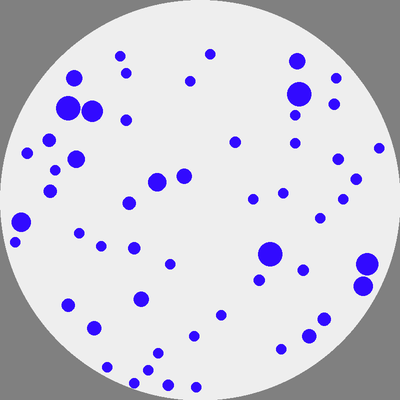

In [5]:
from pynsn import ImageColours
from pynsn.image import svg, pil

# To make picture (pillow), first define some colour features
my_colours = ImageColours(target_area="#EEEEEE", background="gray") # show named colours see Colour.NAMED_COLOURS
pil.create(stimulus, colours=my_colours)

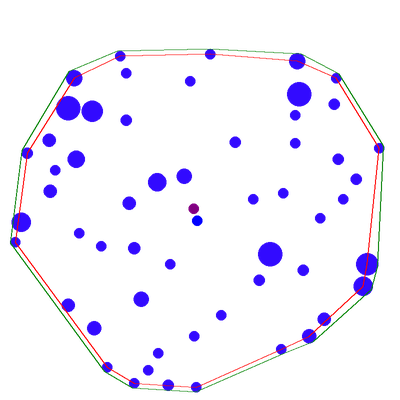

In [6]:
# example: to plot field area and center of mass, just define the repective colours and plot
my_colours2 = ImageColours(target_area=None,
                          field_area="red",
                          field_area_outer="green",
                          center_of_mass="purple",
                          center_of_outer_positions="blue",
                          background=None)
pil.create(stimulus, colours=my_colours2)

In [7]:
# to save the stimulus as vector graphic, generate a SVG stimuli
svg_stimulus = svg.create(stimulus, colours=my_colours, filename="demo.svg")
svg_stimulus.save()

# Visual Features

In [8]:
# show properties for the current stimulus
print(stimulus)

- Hash: 007eae168c7150ebdd71d97001e91617
  Numerosity..........        55.00
  Total surface area..      7991.43
  Mean item surface area       145.30
  Mean item diameter..        13.00
  Total perimeter.....        40.84
  Mean item perimeter.      2246.24
  Field area..........     94922.26
  Sparsity............      1725.86
  Coverage............         0.08
  Log Size............        20.15
  Log Spacing.........        27.29



In [9]:
# change surface array
stimulus.match.total_surface_area(23000)
print(stimulus)

- Hash: f872de52914629a311854fde1671ee59
  Numerosity..........        55.00
  Total surface area..     23000.00
  Mean item surface area       418.18
  Mean item diameter..        22.05
  Total perimeter.....        69.29
  Mean item perimeter.      3810.73
  Field area..........     94922.26
  Sparsity............      1725.86
  Coverage............         0.24
  Log Size............        23.20
  Log Spacing.........        27.29



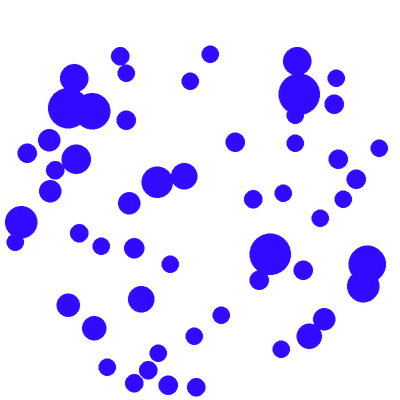

In [10]:
pil.create(stimulus, colours=ImageColours())

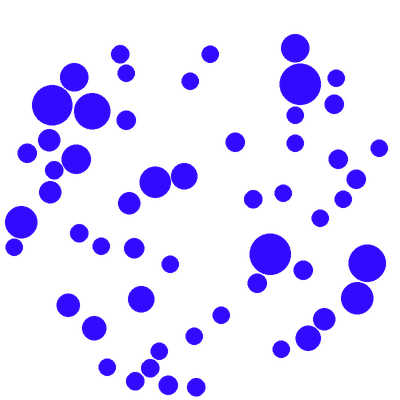

In [11]:
# realign dot arry to avoid overlap
stimulus.realign()
pil.create(stimulus, colours=ImageColours())

In [12]:
# change log_size 
stimulus.match.log_size(18)
print(stimulus)

- Hash: cc688ccbafa34a3bd34e98e6e8332c19
  Numerosity..........        55.00
  Total surface area..      3797.09
  Mean item surface area        69.04
  Mean item diameter..         8.96
  Total perimeter.....        28.15
  Mean item perimeter.      1548.35
  Field area..........     96691.53
  Sparsity............      1758.03
  Coverage............         0.04
  Log Size............        18.00
  Log Spacing.........        27.34



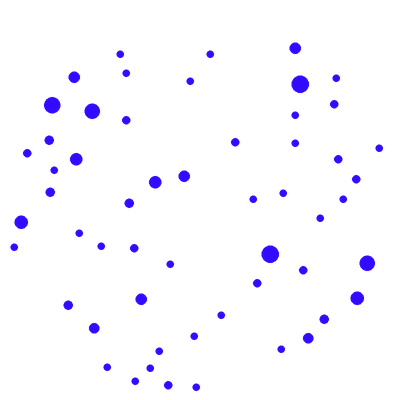

In [13]:
pil.create(stimulus, colours=ImageColours())

In [14]:
# change spacing parameter (iterative procedure)
stimulus.match.log_spacing(23,  precision=0.01)
print(stimulus)

- Hash: 0b7f0d0d5826480493b0e30fec7adb87
  Numerosity..........        55.00
  Total surface area..      3797.09
  Mean item surface area        69.04
  Mean item diameter..         8.96
  Total perimeter.....        28.15
  Mean item perimeter.      1548.35
  Field area..........     21479.60
  Sparsity............       390.54
  Coverage............         0.18
  Log Size............        18.00
  Log Spacing.........        23.00



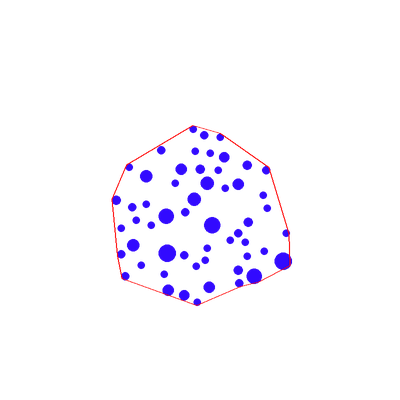

In [15]:
# as you see the surface area and sparsity (1/density) is smaller
pil.create(stimulus, colours=ImageColours(field_area_outer="red"))

# 2 matched stimuli

In [18]:
my_colours = ImageColours(target_area="#EEEEEE") 

da_specification = random_dot_array.Specs(
    target_area_radius=200,
    item_diameter_mean=20,
    item_diameter_range=(10, 25),
    item_diameter_std=4,
    item_colour="green", 
    minimum_gap=2)

stim1 = random_dot_array.create(30, da_specification)
stim2 = random_dot_array.create(30, da_specification)

print(dir(stim2))

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_attributes', '_diameters', '_jitter_identical_positions', '_remove_overlap_for_dot', '_xy', 'append', 'append_dot', 'as_dict', 'center_array', 'center_of_mass', 'center_of_outer_positions', 'clear', 'copy', 'delete', 'diameters', 'distances', 'features', 'get_attributes', 'get_colours', 'get_csv', 'get_dots', 'get_features_split_by_colours', 'hash', 'join', 'json', 'load', 'match', 'minimum_gap', 'number_deviant', 'perimeter', 'random_free_dot_position', 'read_from_dict', 'realign', 'remove_overlap_from_inner_to_outer', 'round', 'save', 'set_attributes', 'shuffle_all_positions', 'split_array_by_colour', 'surface_areas', 'target_array_radius', 'x

In [19]:
stim2